In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hic=pd.read_csv("mESC_chr11_contact_matrix_10kb.txt",sep='\s+')
hic

,x,y,p
0,109010000,109010000,13.783113
1,109010000,109020000,16.970703
2,109020000,109020000,5.698768
3,109010000,109030000,15.661273
4,109020000,109030000,23.820450
...,...,...,...
53949,114820000,114870000,5.545839
53950,114840000,114870000,8.119843
53951,114850000,114870000,15.605515
53952,114860000,114870000,12.850298


In [3]:
def change_value(x):
    return (abs(x-109010000)/10000)+1
hic['x']=hic['x'].apply(change_value)
hic['y']=hic['y'].apply(change_value)
# hic.astype(int)
hic

,x,y,p
0,1.0,1.0,13.783113
1,1.0,2.0,16.970703
2,2.0,2.0,5.698768
3,1.0,3.0,15.661273
4,2.0,3.0,23.820450
...,...,...,...
53949,582.0,587.0,5.545839
53950,584.0,587.0,8.119843
53951,585.0,587.0,15.605515
53952,586.0,587.0,12.850298


In [4]:
hic.loc[hic['p'] > 15, 'p'] = 15
hic

,x,y,p
0,1.0,1.0,13.783113
1,1.0,2.0,15.000000
2,2.0,2.0,5.698768
3,1.0,3.0,15.000000
4,2.0,3.0,15.000000
...,...,...,...
53949,582.0,587.0,5.545839
53950,584.0,587.0,8.119843
53951,585.0,587.0,15.000000
53952,586.0,587.0,12.850298


In [5]:
hic

,x,y,p
0,1.0,1.0,13.783113
1,1.0,2.0,15.000000
2,2.0,2.0,5.698768
3,1.0,3.0,15.000000
4,2.0,3.0,15.000000
...,...,...,...
53949,582.0,587.0,5.545839
53950,584.0,587.0,8.119843
53951,585.0,587.0,15.000000
53952,586.0,587.0,12.850298


In [6]:
hic['p']=hic['p'].apply(lambda x : x/15)
hic

,x,y,p
0,1.0,1.0,0.918874
1,1.0,2.0,1.000000
2,2.0,2.0,0.379918
3,1.0,3.0,1.000000
4,2.0,3.0,1.000000
...,...,...,...
53949,582.0,587.0,0.369723
53950,584.0,587.0,0.541323
53951,585.0,587.0,1.000000
53952,586.0,587.0,0.856687


In [7]:
import seaborn as sns

In [8]:
import numpy as np

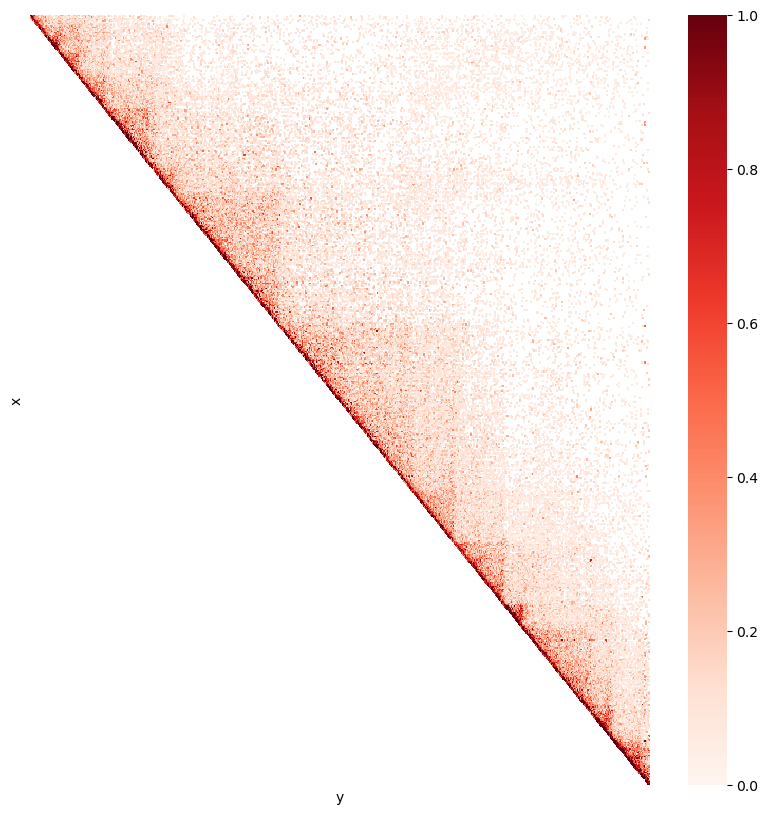

In [9]:
cont=hic.pivot('x','y','p')
plt.subplots(figsize=(10,10))
display=sns.heatmap(cont,cmap='Reds',xticklabels=False,yticklabels=False,vmin=0.0,vmax=1.0,cbar=True)

In [10]:
hic_mod=hic[hic['x'] != hic['y']]
hic_mod

,x,y,p
1,1.0,2.0,1.000000
3,1.0,3.0,1.000000
4,2.0,3.0,1.000000
6,1.0,4.0,0.591999
7,2.0,4.0,1.000000
...,...,...,...
53948,581.0,587.0,0.601185
53949,582.0,587.0,0.369723
53950,584.0,587.0,0.541323
53951,585.0,587.0,1.000000


In [11]:
hic_mod.to_csv('mESC_exp.txt',index=None,sep=' ')

In [12]:
hic_mod.loc[hic_mod['p'] == 1.0, 'bonds'] = '2'
hic_mod.loc[(hic_mod['p'] < 1.0) & (hic_mod['p']>0.95), 'bonds'] = '3'
hic_mod.loc[(hic_mod['p'] < 0.95) & (hic_mod['p']>0.9), 'bonds'] = '4'
hic_mod.loc[(hic_mod['p'] < 0.9) & (hic_mod['p']>0.85), 'bonds'] = '5'
hic_mod.loc[(hic_mod['p'] < 0.85) & (hic_mod['p']>0.8), 'bonds'] = '6'
hic_mod.loc[(hic_mod['p'] < 0.8) & (hic_mod['p']>0.75), 'bonds'] = '7'
hic_mod.loc[(hic_mod['p'] < 0.75) & (hic_mod['p']>0.7), 'bonds'] = '8'
hic_mod.loc[(hic_mod['p'] < 0.7) & (hic_mod['p']>0.65), 'bonds'] = '9'
hic_mod.loc[(hic_mod['p'] < 0.65) & (hic_mod['p']>0.6), 'bonds'] = '10'
hic_mod.loc[(hic_mod['p'] < 0.6) & (hic_mod['p']>0.55), 'bonds'] = '11'
hic_mod.loc[(hic_mod['p'] < 0.55) & (hic_mod['p']>0.5), 'bonds'] = '12'
hic_mod.loc[(hic_mod['p'] < 0.5) & (hic_mod['p']>0.45), 'bonds'] = '13'
hic_mod.loc[(hic_mod['p'] < 0.45) & (hic_mod['p']>0.4), 'bonds'] = '14'
hic_mod.loc[(hic_mod['p'] < 0.4) & (hic_mod['p']>0.35), 'bonds'] = '15'
hic_mod.loc[(hic_mod['p'] < 0.35) & (hic_mod['p']>0.3), 'bonds'] = '16'
hic_mod.loc[(hic_mod['p'] < 0.3) & (hic_mod['p']>0.25), 'bonds'] = '17'
hic_mod.loc[(hic_mod['p'] < 0.25) & (hic_mod['p']>0.2), 'bonds'] = '18'
hic_mod.loc[(hic_mod['p'] < 0.2) & (hic_mod['p']>0.15), 'bonds'] = '19'
hic_mod.loc[(hic_mod['p'] < 0.15) & (hic_mod['p']>0.1), 'bonds'] = '20'
hic_mod.loc[(hic_mod['p'] < 0.1) , 'bonds']='NAN'
hic_mod

/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexing.py:1598: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be se

,x,y,p,bonds
1,1.0,2.0,1.000000,2
3,1.0,3.0,1.000000,2
4,2.0,3.0,1.000000,2
6,1.0,4.0,0.591999,11
7,2.0,4.0,1.000000,2
...,...,...,...,...
53948,581.0,587.0,0.601185,10
53949,582.0,587.0,0.369723,15
53950,584.0,587.0,0.541323,12
53951,585.0,587.0,1.000000,2


In [13]:
hic2=hic_mod[hic_mod['x'] != hic_mod['y']]
hic2

,x,y,p,bonds
1,1.0,2.0,1.000000,2
3,1.0,3.0,1.000000,2
4,2.0,3.0,1.000000,2
6,1.0,4.0,0.591999,11
7,2.0,4.0,1.000000,2
...,...,...,...,...
53948,581.0,587.0,0.601185,10
53949,582.0,587.0,0.369723,15
53950,584.0,587.0,0.541323,12
53951,585.0,587.0,1.000000,2


In [14]:
hic4=hic2.drop(hic2[(hic2['x']+1) == (hic2['y'])].index)
hic4

,x,y,p,bonds
3,1.0,3.0,1.000000,2
6,1.0,4.0,0.591999,11
7,2.0,4.0,1.000000,2
10,1.0,5.0,0.687689,9
11,2.0,5.0,0.658568,9
...,...,...,...,...
53947,579.0,587.0,0.637872,10
53948,581.0,587.0,0.601185,10
53949,582.0,587.0,0.369723,15
53950,584.0,587.0,0.541323,12


In [15]:
hic5=hic4.drop(hic2[(hic2['x']+2) == (hic2['y'])].index)
hic5

,x,y,p,bonds
6,1.0,4.0,0.591999,11
10,1.0,5.0,0.687689,9
11,2.0,5.0,0.658568,9
15,1.0,6.0,0.763217,7
16,2.0,6.0,0.469862,13
...,...,...,...,...
53946,578.0,587.0,0.143359,20
53947,579.0,587.0,0.637872,10
53948,581.0,587.0,0.601185,10
53949,582.0,587.0,0.369723,15


In [16]:
hic6=hic5.drop(hic2[(hic2['x']+3) == (hic2['y'])].index)
hic6

,x,y,p,bonds
10,1.0,5.0,0.687689,9
15,1.0,6.0,0.763217,7
16,2.0,6.0,0.469862,13
21,1.0,7.0,0.228918,18
22,2.0,7.0,0.352325,15
...,...,...,...,...
53945,577.0,587.0,0.343410,16
53946,578.0,587.0,0.143359,20
53947,579.0,587.0,0.637872,10
53948,581.0,587.0,0.601185,10


In [17]:
hic7=hic6.drop(hic2[(hic2['x']+4) == (hic2['y'])].index)
hic7

,x,y,p,bonds
15,1.0,6.0,0.763217,7
21,1.0,7.0,0.228918,18
22,2.0,7.0,0.352325,15
28,1.0,8.0,0.209190,18
29,2.0,8.0,0.343425,16
...,...,...,...,...
53945,577.0,587.0,0.343410,16
53946,578.0,587.0,0.143359,20
53947,579.0,587.0,0.637872,10
53948,581.0,587.0,0.601185,10


In [18]:
hic8=hic7.drop(hic2[(hic2['x']+5) == (hic2['y'])].index)
hic8

,x,y,p,bonds
21,1.0,7.0,0.228918,18
28,1.0,8.0,0.209190,18
29,2.0,8.0,0.343425,16
36,1.0,9.0,0.217587,18
37,2.0,9.0,0.267908,17
...,...,...,...,...
53944,576.0,587.0,0.351999,15
53945,577.0,587.0,0.343410,16
53946,578.0,587.0,0.143359,20
53947,579.0,587.0,0.637872,10


In [19]:
hic9=hic8.drop(hic2[(hic2['x']+6) == (hic2['y'])].index)
hic9

,x,y,p,bonds
28,1.0,8.0,0.209190,18
36,1.0,9.0,0.217587,18
37,2.0,9.0,0.267908,17
45,1.0,10.0,0.263522,17
46,2.0,10.0,0.081117,NAN
...,...,...,...,...
53943,575.0,587.0,0.243579,18
53944,576.0,587.0,0.351999,15
53945,577.0,587.0,0.343410,16
53946,578.0,587.0,0.143359,20


In [20]:
hic10=hic9.drop(['p'],axis=1)
hic10

,x,y,bonds
28,1.0,8.0,18
36,1.0,9.0,18
37,2.0,9.0,17
45,1.0,10.0,17
46,2.0,10.0,NAN
...,...,...,...
53943,575.0,587.0,18
53944,576.0,587.0,15
53945,577.0,587.0,16
53946,578.0,587.0,20


In [21]:
indexNames = hic10[ hic10['bonds'] == 'NAN' ].index
# Delete these row indexes from dataFram
hic10.drop(indexNames , inplace=True)
hic10

,x,y,bonds
28,1.0,8.0,18
36,1.0,9.0,18
37,2.0,9.0,17
45,1.0,10.0,17
47,3.0,10.0,17
...,...,...,...
53943,575.0,587.0,18
53944,576.0,587.0,15
53945,577.0,587.0,16
53946,578.0,587.0,20


In [22]:
hic10.to_csv('hic_polymer.txt',index=False,sep=' ')

In [23]:
bonds_data=pd.read_csv('hic_polymer.txt',sep='\s+')
bonds_data

,x,y,bonds
0,1.0,8.0,18
1,1.0,9.0,18
2,2.0,9.0,17
3,1.0,10.0,17
4,3.0,10.0,17
...,...,...,...
26920,575.0,587.0,18
26921,576.0,587.0,15
26922,577.0,587.0,16
26923,578.0,587.0,20


In [24]:
bonds_data_2 = bonds_data[["bonds", "x", "y"]]
bonds_data_2

,bonds,x,y
0,18,1.0,8.0
1,18,1.0,9.0
2,17,2.0,9.0
3,17,1.0,10.0
4,17,3.0,10.0
...,...,...,...
26920,18,575.0,587.0
26921,15,576.0,587.0
26922,16,577.0,587.0
26923,20,578.0,587.0


In [25]:
bonds_data_5=bonds_data_2.iloc[::7,:]
bonds_data_5

,bonds,x,y
0,18,1.0,8.0
7,11,4.0,11.0
14,18,4.0,13.0
21,15,7.0,14.0
28,17,3.0,16.0
...,...,...,...
26894,20,522.0,587.0
26901,20,543.0,587.0
26908,17,562.0,587.0
26915,20,569.0,587.0


In [26]:
bonds_data_5.to_csv('bonds_data_5.txt',index=None,sep=' ')

In [27]:
f=open('file_numerics_bonds.txt','w')
for i in range(587,4434):
         f.write("%d\n" % (i))
f.close()

In [28]:
numeric=pd.read_csv('file_numerics_bonds.txt',header=None)
numeric

,0
0,587
1,588
2,589
3,590
4,591
...,...
3842,4429
3843,4430
3844,4431
3845,4432


In [29]:
bonds_data_6=pd.read_csv('bonds_data_5.txt',sep='\s+')
bonds_data_6

,bonds,x,y
0,18,1.0,8.0
1,11,4.0,11.0
2,18,4.0,13.0
3,15,7.0,14.0
4,17,3.0,16.0
...,...,...,...
3842,20,522.0,587.0
3843,20,543.0,587.0
3844,17,562.0,587.0
3845,20,569.0,587.0


In [30]:
frames=[numeric,bonds_data_6]

In [31]:
bonds_finale=pd.concat(frames,axis=1)
bonds_finale

,0,bonds,x,y
0,587,18,1.0,8.0
1,588,11,4.0,11.0
2,589,18,4.0,13.0
3,590,15,7.0,14.0
4,591,17,3.0,16.0
...,...,...,...,...
3842,4429,20,522.0,587.0
3843,4430,20,543.0,587.0
3844,4431,17,562.0,587.0
3845,4432,20,569.0,587.0


In [32]:
bonds_finale.to_csv('mESC_bonds_finale.txt',index=None,sep=' ')